In [1]:
import netCDF4 as nc
import matplotlib.pyplot as plt
from matplotlib.colors import from_levels_and_colors
import numpy as np
from matplotlib import animation
from matplotlib.colors import BoundaryNorm
import matplotlib.colors as cols
import matplotlib as mpl
from mpl_toolkits.basemap import Basemap
from matplotlib import ticker, cm
import seaborn as sns

In [2]:
data1=nc.Dataset('/ihesp/xiliangdiao/ihespdata/ocn300/cmpr_B.E.13.B1850C5.ne120_t12.sehires38.003.sunway_02.pop.h.0029-06.TAUX.nc')
TAUX = data1.variables['TAUX'][0]
lont = data1.variables['ULONG']
latt = data1.variables['ULAT']
TAUX[TAUX == -1.0] = np.nan
TAUX[TAUX >  1000] = np.nan

/scratch/user/xiliangdiao/.conda/envs/python3/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in greater
  


In [3]:
TAUX[400,:]

masked_array(data=[2.9646871089935303, 2.9523279666900635,
                   2.936947822570801, ..., 3.0032763481140137,
                   2.9897584915161133, 2.9763681888580322],
             mask=[False, False, False, ..., False, False, False],
       fill_value=9.96921e+36,
            dtype=float32)

In [4]:
###### (u2-u1)/(y2-y1)
a = np.arange(0,600)
A1= np.zeros([600,3600])
for i in a:
    A1[i,:] = (TAUX[i+1,:]-TAUX[i,:])/((latt[i+1,:]-latt[i,:])*110.95)

In [5]:
lont1= lont[0:600,:]
latt1 = latt[0:600,:]

/scratch/user/xiliangdiao/.conda/envs/python3/lib/python3.6/site-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  del sys.path[0]
/scratch/user/xiliangdiao/.conda/envs/python3/lib/python3.6/site-packages/ipykernel_launcher.py:28: UserWarning: The following kwargs were not used by contour: 'spacing'


Text(0.5, 0, 'Sea-ice Vorticity (1/day) ,  Time(118-09)')

findfont: Font family ['Cambria'] not found. Falling back to DejaVu Sans.


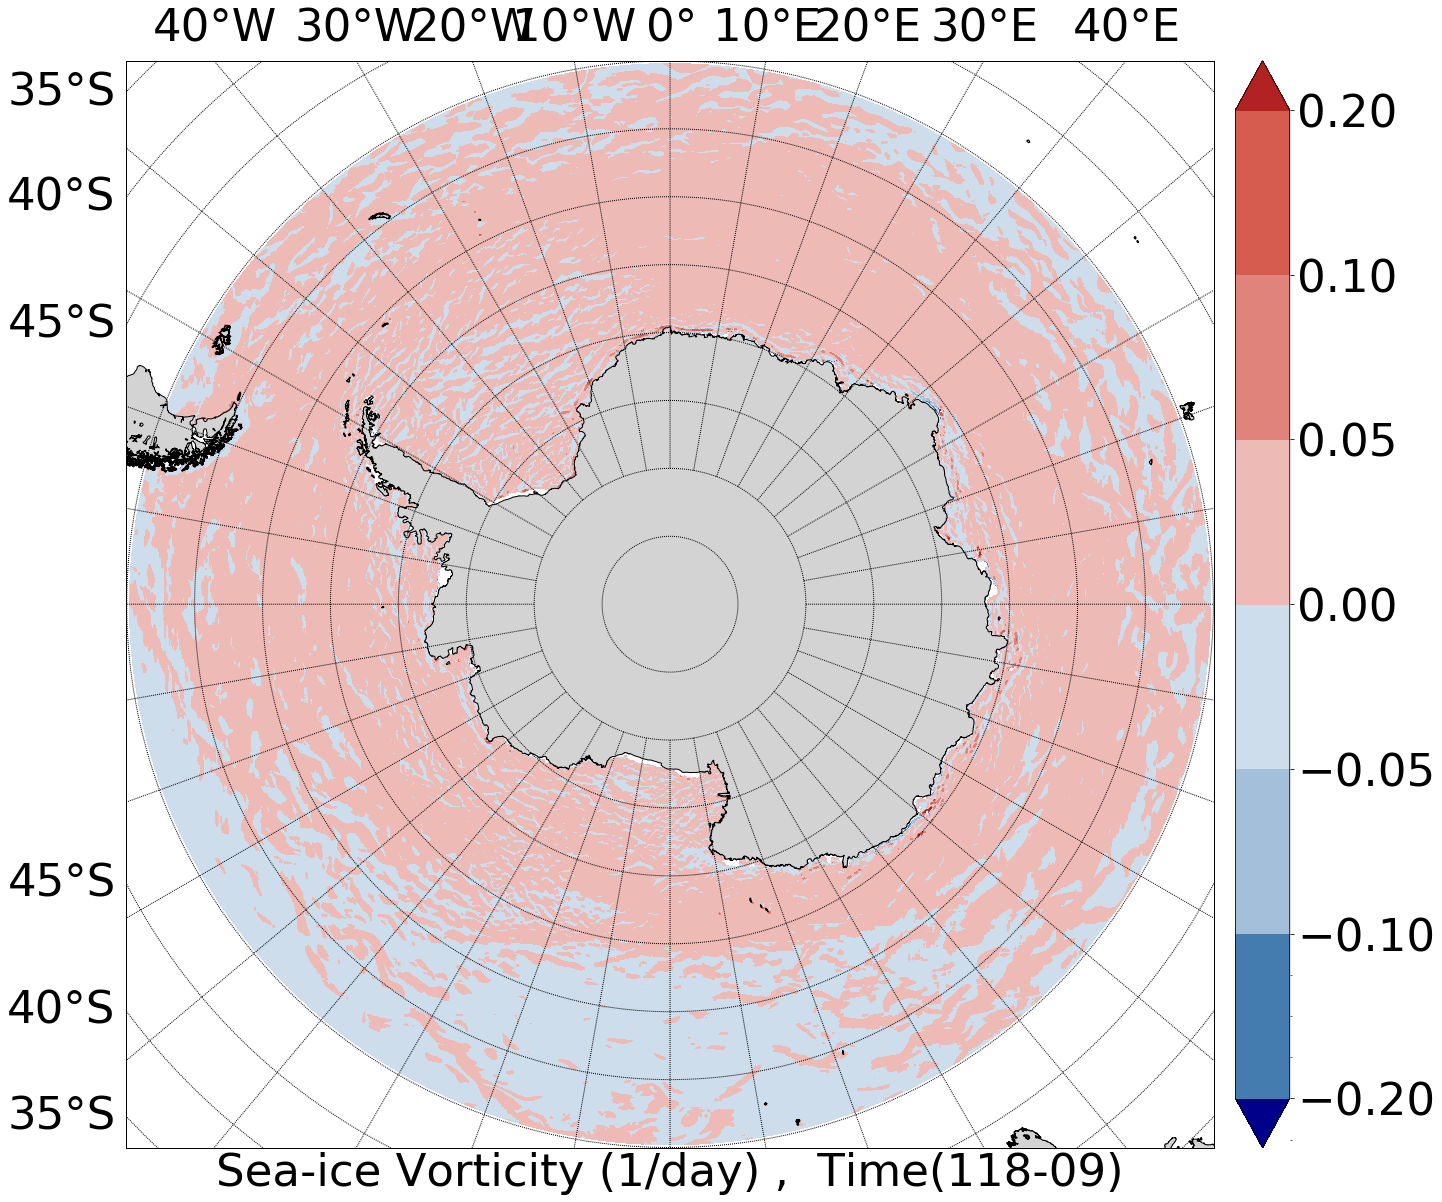

In [6]:
nice_cmap=sns.diverging_palette(245, 15, n=13,as_cmap=True)
#nice_cmap=sns.diverging_palette(245, 10, n=10,as_cmap=True)
lev_cmap = nice_cmap([1,30,70,90,100,130,150,170,190,210,220,230,240]) 
new_cmap = cols.ListedColormap(lev_cmap,"praj_cmap")
nice_levels = [-0.2,-0.1,-0.05,0,0.05,0.1,0.2]
norm = mpl.colors.BoundaryNorm(nice_levels, new_cmap.N)
#********************************************************************

plt.figure(figsize=(25,20))
my_font = {'fontname':'Cambria', 'size':'45'}
# set the mapping range
map = Basemap(projection='aeqd', lat_0 = -90, lon_0 = 0,area_thresh = 100,\
                     width = 8900000,height = 8900000,resolution ='h') 
#############################################
##width = 2500000,height = 1500000
##lat_0 = -65, lon_0 = 0
#############################################
map.drawcoastlines()
map.fillcontinents(color = 'lightgrey')
map.drawmapboundary(color='black')
 
map.drawparallels(np.arange(-90,91,5),labels=[1,0,0,0],**my_font)
map.drawmeridians(np.arange(-180,180,10),labels=[0,0,1,0],**my_font)

x,y=map(lont1,latt1)
#CP = map.contourf(x,y,A3,range(-2,3),cmap = nice_cmap,extend='both')

CP = map.contourf(x,y,A1,cmap = new_cmap,norm =norm,spacing = 'uniform',levels = nice_levels,extend='both')
CP.cmap.set_over('firebrick')
CP.cmap.set_under('darkblue')
#map.drawmeridians([3,-67],[3,-62],'purple',linestyles = 'solid',linewidths=3)
#CS=map.contour(map([2],[-67]),colors = 'b', linestyles = 'solid',linewidths=3)
#CS=map.contour(x,y,A3,[700],colors = 'r', linestyles = 'solid',linewidths=1)
#plt.clabel(CS, inline=0.1, fontsize=30)
#cbar =map.colorbar(CP,extend='both',extendfrac='auto',extendrect='True')
#cbar = fig.colorbar(pos_neg_clipped, ax=ax3, extend='both')
cbar =map.colorbar(CP)
cbar.minorticks_on()
cbar.ax.tick_params(labelsize=45) 
#cbar.set_label('(1/day)', **my_font)
plt.xlabel("Sea-ice Vorticity (1/day) ,  Time(118-09)",**my_font)
#plt.savefig("Sea-ice Vorticity 118-09new.png")